# Computing distances using Gaia parallaxes

Written by Logan Pearce, 2018

This tutorial uses the following references:<br>
Luri et. al. 2018 (https://arxiv.org/abs/1804.09376)<br>
Bailer-Jones 2015 (https://arxiv.org/pdf/1507.02105.pdf)<br>
Astraatmadja & Bailer-Jones 2016 ('Paper 2' http://iopscience.iop.org/article/10.3847/0004-637X/832/2/137/pdf)<br>
Astraatmadja & Bailer-Jones 2016 ('Paper 3' http://www.mpia.de/~calj/tgas_distances/parallax3.pdf)<br>

### Gaia parallaxes
If we for sure 100% knew the correct parallax for an object with zero uncertainty, the distance to that object would easily be computed as $d = 1/\omega$, with d in parsecs and $\omega$ in arcseconds.  This is what I will called the "naive estimator", the estimator for distance if we knew it perfectly and needed nothing else.

But obviously we don't have the perfect measurement for parallax, and we have to consider how the uncertainty in the parallax measurement affects the results.  Bailer-Jones 2015 presents the case for making the distance estimation from parallax a Bayesian inference problem.  I won't go in to the set up of the Bayesian problem (that is laid out nicely in Bailer-Jones 2015), but instead adapt his methodology and R code tutorials into Python.

But first let's start with a set of data.  Let's use the astroquery python interface to query the Gaia DR2 database for some data to work with.  I want an assortment of data quality to show the effects of quality, so I'm actually going to grab 10 sources from 3 different parts of the archive.

This cell establishes a TAP connection to the Gaia archive and submits and ADQL query (a variant of SQL standard queries).  Each query as written here selects the top 10 results in the archive that meet the "WHERE condition of a maxmimum parallax value, going in order of descending parallax values. It then makes the three results into a pandas dataframe

In [1]:
import pandas as pd
from astroquery.gaia import Gaia
import time

start = time.time()
job = Gaia.launch_job_async(query="SELECT TOP 10 source_id,parallax,parallax_error \
                    FROM gaiadr2.gaia_source WHERE parallax <= 50 \
                    ORDER BY parallax DESC",\
                    verbose=False, dump_to_file=False, output_format='csv')
end = time.time()
print 'Query took: ',(end - start),' s'
g=job.get_results()
g = g.to_pandas()

job = Gaia.launch_job_async(query="SELECT TOP 100 source_id,parallax,parallax_error \
                    FROM gaiadr2.gaia_source WHERE parallax <= 5 \
                    ORDER BY parallax DESC",\
                    verbose=False, dump_to_file=False, output_format='csv')
end = time.time()
print 'Query took: ',(end - start),' s'
h=job.get_results()
h = h.to_pandas()

job = Gaia.launch_job_async(query="SELECT TOP 10 source_id,parallax,parallax_error \
                    FROM gaiadr2.gaia_source WHERE parallax <= 2 \
                    ORDER BY parallax DESC",\
                    verbose=False, dump_to_file=False, output_format='csv')
end = time.time()
print 'Query took: ',(end - start),' s'
j=job.get_results()
j = j.to_pandas()

k = pd.concat([g,h,j],axis=0,ignore_index=True)
k

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Query finished.
Query took:  1.13707089424  s
Query finished.
Query took:  2.4522550106  s
Query finished.
Query took:  3.58800697327  s


,source_id,parallax,parallax_error
0,6031367499416648192,49.997217,0.762470
1,4998699749034263808,49.995542,0.277711
2,5019191935652145792,49.995195,0.065214
3,5926081083446898816,49.989775,2.108200
4,6158476403698590464,49.986409,0.300952
5,1089400763661597440,49.974396,0.046881
6,4093135345309198848,49.956791,1.985290
7,4039667297469197568,49.944073,2.202367
8,5097351956664593152,49.926836,0.051026
9,735453264711448064,49.926656,0.132663


Let's look at the data quality we have in the sample by looking at the fractional parallax error, which is a good measure of parallax measurement quality.  Fractional parallax error is the proportion of the parallax value that the error: $f = \frac{\sigma_{\omega}}{\omega}$, a smaller value is better quality  (There is a parameter in the Gaia solution called "parallax_over_error", which is the inverse of f, and an equal measure of data quality, with larger numbers being better.  References use both, but Bailer-Jones works with f, so I will work with it here)

<IPython.core.display.Javascript object>


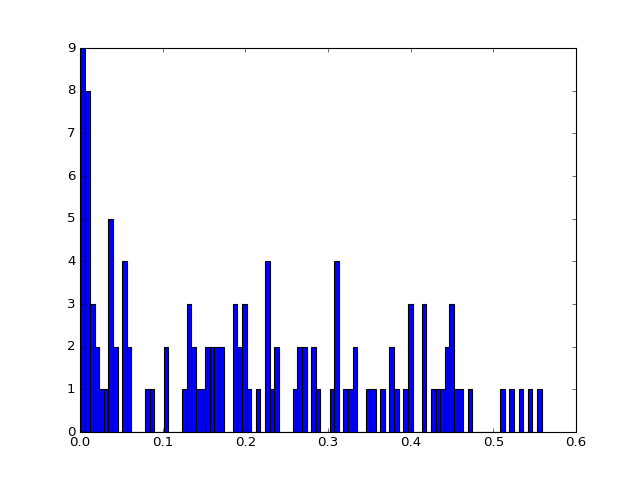

In [3]:
f = k['parallax_error'].values/k['parallax'].values

from matplotlib import pyplot as plt
%matplotlib notebook
plt.hist(f,bins=100)
plt.show()

So it doesn't look very good because we only have 120 points, but we see that most values of f are very small, while a few are as large as 50% error.

### Determining posterior distribution for distance in our sample:

Bailer-Jones 2015 and Luri et. al 2018 make the case that the best way to approach deriving a distance estimate from parallaxes is the treat it as an inference problem - that is, using a Bayesian approach.<br>
Bayes' formula applied here is given by:
\begin{equation*}
P(r \mid \varpi , \sigma_{\varpi}) = \frac{1}{Z} P(\varpi \mid r , \sigma_{\varpi})P(r)
\end{equation*}

Where $P(\varpi \mid r , \sigma_{\varpi})$ is the likelihood of the parallax measurement for a given distance r and is described by a Gaussian distribution about r with variance $\sigma_{\varpi}^{2}$, and $P(r)$ is the prior distribution of the probability for each distance r, and Z is a normalization constant.

Bailer-Jones and Astraatmadja test three choices for a prior on r: 1 - a uniform distribution, 2 - a uniform space density of stars, and 3 - an exponentially decreasing space density of stars with a scale length L.  They determined that the exponentially decreasing distribution is the only one that does an adequate job of describing obeservations, so I will not even address the others here.

Exponentially decreasing space density PDF:
\begin{equation*}
P(r)   = \frac{1}{L^{3}} r^{2} e^{-\frac{r}{L}} \; for \; r>0
\end{equation*}

This prior gives the posterior distribution:
\begin{equation*}
P(r)   = \frac{r^{2} \, e^{-\frac{r}{L}}}{\sigma_{\varpi}} \, exp \big[-\frac{1}{2\sigma^{2}_{\varpi}} \, \big(\varpi - \frac{1}{r} \big)^{2}\big] \; for \; r > 0
\end{equation*}

They determine in Paper 2 that the scale length that best matches observations is L = 1.35 kpc

They test several statistics on this posterior as distance estimators, and found the mode of the distribution is the best distance estimator.  <br>
The mode can be easily found by maximizing the function, which results in finding the root of the equation: <br>
\begin{equation*}
\frac{r^{3}}{L} - 2r^{2} + \frac{\varpi}{\sigma^{2}_{\varpi}} r - \frac{1}{\sigma^{2}_{\varpi}} = 0
\end{equation*}

Which can be easily done for each source in the list using numpy root finding.<br>
What isn't as easy is the uncertainty for this statistic.  Bailer-Jones recommends using 95% credible intervals rather than standard deviations, since a standard deviation has the potential to allow negative distances, which isn't physical. <br>



#### Proof of Concept: Posterior distributions

First let's look at the prior - expentially decreasing space density of stars.  This plot shows the probability of a star in this model galaxy being a certain distance away.

<IPython.core.display.Javascript object>


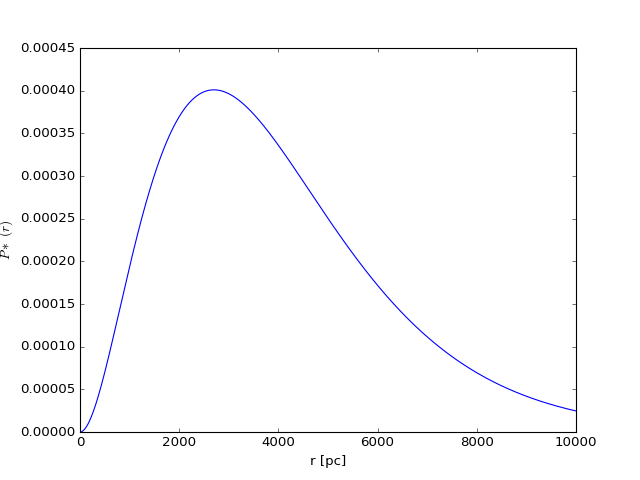

In [4]:
import numpy as np
L=1350
r = np.linspace(1,10000,1e3-1)
p = (1./L**3)*r**2*np.exp(-(r/L))

%matplotlib notebook
plt.plot(r,p)
plt.ylabel('$P*\;(r)$')
plt.xlabel('r [pc]')
plt.show()

Now let's look at the posterior distribution of distance for a few of these objects, and see how data quality affects them.

<IPython.core.display.Javascript object>


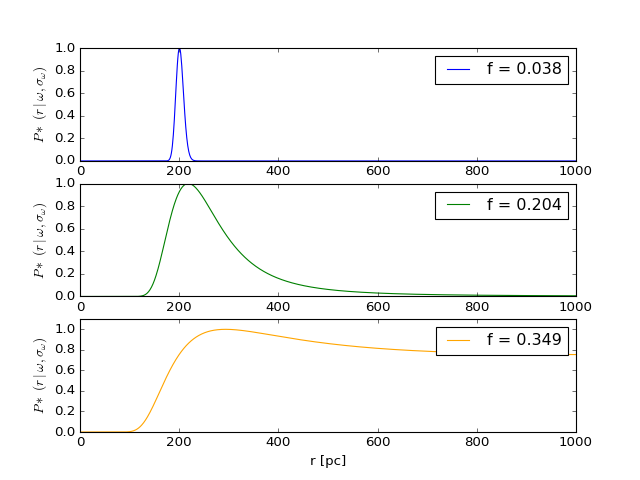

In [15]:
omega,sigma = k['parallax'].values/1000,k['parallax_error'].values/1000
index1=100
index2=95
index3=107

%matplotlib notebook
plt.subplot(311)
r = np.linspace(1,1000,1e3-1)
post1 = (r**2*np.exp(-r/L)/sigma[index1])*np.exp((-1/(2*(sigma[index1])**2))*(omega[index1]-(1/r))**2)
plt.plot(r,post1/np.max(post1),label='f = {0}'.format(np.round(f[index1],decimals=3)))
#plt.annotate('omega = {0}'.format(np.round(omega[index1]),decimals=3),xy=(0.7,0.8),xycoords="figure fraction")
plt.legend()
plt.ylabel('$P*\;(r \mid \omega , \sigma_{\omega})$')

plt.subplot(312)
r = np.linspace(1,1000,1e3-1)
post2 = (r**2*np.exp(-r/L)/(sigma[index2]))*np.exp((-1/(2*(sigma[index2])**2))*(omega[index2]-(1/r))**2)
plt.plot(r,post2/np.max(post2),label='f = {0}'.format(np.round(f[index2],decimals=3)),color='green')
plt.legend()
plt.ylabel('$P*\;(r \mid \omega , \sigma_{\omega})$')

plt.subplot(313)
r = np.linspace(1,1000,1e3-1)
post3 = (r**2*np.exp(-r/L)/(sigma[index3]))*np.exp((-1/(2*(sigma[index3])**2))*(omega[index3]-(1/r))**2)
plt.plot(r,post3/np.max(post3),label='f = {0}'.format(np.round(f[index3],decimals=3)),color='orange')
plt.ylim(0,1.1)
plt.legend()
plt.ylabel('$P*\;(r \mid \omega , \sigma_{\omega})$')
plt.xlabel('r [pc]')
plt.show()


In [16]:
print omega[index1],omega[index2],omega[index3]

0.00499997337758 0.00499997536364 0.00499997097985


These three sources have essentially the same parallax value, but vastly different data qualities.  And you can see the result on the distance estimator (rmode) in the posterior distributions above.  The low f value source is well constrained; the medium one is decently well estimated, but you can see that it is skewed and not well approximated by normality.  The large f value one clearly has a wide distribution of possible distances that could liekly generate the parallax we measured.

### Computing distance from parallaxes:

The Gaia group has a set of tutorials on computing distances for single sources in R, located here:
https://github.com/agabrown/astrometry-inference-tutorials/tree/master/single-source/tutorial
All of the following is an adaptation of this R tutorial into python.

Let's address the distance estimate first.
* Note - Gaia parallaxes have a zero-point shift of -0.029 mas. So 0.029 mas must be added to the measured parallax to get accurate distances. (Luri et. al. 2018 (https://arxiv.org/abs/1804.09376 )  Also, the parallax must be converted to arcseconds to get the distance in parcsecs.

In [17]:
import numpy as np
# Set scale length for prior:
L=1350 #parsecs

start = time.time()
# convert to arcsec and add in zero-point shift
omega,sigma = (k['parallax'].values+0.029)/1000,k['parallax_error'].values/1000
gdist = np.array([])

print 'Computing distances'
count=0
for i in range(len(omega)):
    # establish the coefficients of the mode-finding polynomial:
    coeff = np.array([(1./L),(-2),((omega[i])/((sigma[i])**2)),-(1./((sigma[i])**2))])
    # use numpy to find the roots:
    g = np.roots(coeff)
    # Find the number of real roots:
    reals = np.isreal(g)
    realsum = np.sum(reals)
    # If there is one real root, that root is the  mode:
    if realsum == 1:
        gd = np.real(g[np.where(reals)[0]])
    # If all roots are real:
    elif realsum == 3:
        if omega[i] >= 0:
            # Take the smallest root:
            gd = np.min(g)
        elif omega[i] < 0:
            # Take the positive root (there should be only one):
            gd = g[np.where(g>0)[0]]
    gdist = np.append(gdist,gd)
    
    count = count+1
    mod=count%50
    if mod==0:
        print 'Finished ',count,' sources'
print 'Finished distances for ',gdist.shape[0], 'sources'

end = time.time()
print 'This took: ',(end - start),' s'

Computing distances
Finished  50  sources
Finished  100  sources
Finished distances for  120 sources
This took:  0.0423810482025  s


So now we have an estimate based on the node of the posterior distribution for each source.

<IPython.core.display.Javascript object>


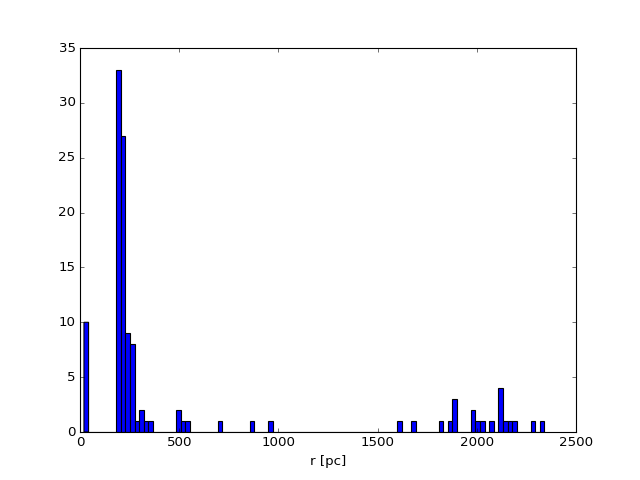

In [20]:
%matplotlib notebook
plt.hist(gdist,bins=100)
plt.xlabel('r [pc]')
plt.show()

### Compute FWHM:

Again, following the method of B-J2015, the FWHM of the distribution becomes a root finding problem (only this time it's not a polynomial, so we will used scipy optimize rather than numpy's polynomial rootfinding).  Again this is adapted from the R tutorial guide and the methods of B-J2015.

In [25]:
from scipy.optimize import brentq
start = time.time()
count=0
rmax = 1e6
fwhm_lo,fwhm_hi = np.array([]),np.array([])
for i in range(len(omega)):
    rmode = gdist[i]
    M = (rmode**2*np.exp(-rmode/L)/sigma[i])*np.exp((-1./(2*(sigma[i])**2))*(omega[i]-(1./rmode))**2)
    lo = brentq(lambda x: 2*np.log(x)-(x/L)-(((omega[i]-(1./x))**2)/(2*sigma[i]**2)) \
               +np.log(2)-np.log(M)-np.log(sigma[i]), 0.001, rmode)
    hi = brentq(lambda x: 2*np.log(x)-(x/L)-(((omega[i]-(1./x))**2)/(2*sigma[i]**2)) \
               +np.log(2)-np.log(M)-np.log(sigma[i]), rmode, rmax)
    fwhm_lo,fwhm_hi = np.append(fwhm_lo,lo),np.append(fwhm_hi,hi)
    
    count = count+1
    mod=count%50
    if mod==0:
        print 'Finished ',count,' sources'

print 'Finished FWHM for ',fwhm_lo.shape[0]
end = time.time()
print 'This took: ',(end - start),' s'

Finished  50  sources
Finished  100  sources
Finished FWHM for  120
This took:  0.0726130008698  s


### Compute 95% Credible Interval
To estimate the uncertainty, B-J2015 recommends using 95% CI of the posterior distribution, because the standard deviation has the potential to include negative parallaxes, which is non-physical.  Also, because many of our posteriors aren't well approximated as Gaussian, using a simple $\sigma = \frac{FWMH}{2.355}$ doesn't work is most cases.  So B-J2015 and the R tutorial recommends using a Markov-Chain Monte Carlo (MCMC) algorithm.

R has a nice little MCMC algorithm that B-J2015 tutorial makes use of.  I was unable to find a straight forward pre-built one, and found it simple to just write my own simple one-parameter MCMC sampler.

In [27]:
from scipy.stats.mstats import mquantiles
from scipy.stats import norm

# 1 - define the probability function
def prob(r,o,s):
    p = (r**2*np.exp(-r/L)/(s))*np.exp((-1/(2*(s)**2))*(o-(1/r))**2)
    if not np.isfinite(p):
        return -np.inf 
    return p

# 2 - define the MCMC sampler:
def sampler(lnprob,mu_init=0,o=0,s=0,proposal_width=0.5,nsamples=50,prob=[0.05, 0.5, 0.95]):
    '''Samples the parameter space for a 1-parameter function.  It is specific to the problem at
       hand and not generalizable as written to other functions.
    Args:
        lnprob (func): the probability function
        mu_init (float): initial guess for critial point of function
        o (float): parallax for probability function
        s (float): parallax uncertainty
        proposal_width (float): how large should each jump be (try to get acceptance rate ~30-40%)
        nsamples (int): how many samples to test
        prob (array): quantiles to return.  Default is 5%, 50%, and 95%
    Returns
        posterior (array): The chain of samples
        mquantiles (array): the compiuted quantiles
        acceptance rate (float)
    '''
    # Begin with initial guess
    mu_current = mu_init
    # Initialize the posterior chain
    posterior = [mu_current]
    # Initialize the acceptance rate tracker
    yes_accept = 0
    for i in range(nsamples):
        # Propose a new value for mu from a normal distribution centered at the current 
        # value of mu and spread by the proposal width
        mu_proposal = norm(mu_current,proposal_width).rvs()
        # Determine the likelihood of the new proposal
        prob_of_proposal = lnprob(mu_proposal,o,s)
        # Determine the likelihood of the old mu value
        prob_current = lnprob(mu_current,o,s)
        # Determing the likelihood ratio of new to old:
        p_accept = prob_of_proposal/prob_current
        # Random "dice roll"
        dice = np.random.rand()
        # Accept the new proposal if it is more likely than the dice roll
        accept = dice < p_accept
        if accept:
            # If accepted move to the new value.  Otherwise stay on the old value
            mu_current = mu_proposal
            yes_accept = yes_accept+1 #for tracking acceptance rate
        # Add the current value to the posterior chain and repeat.
        posterior.append(mu_current)
    return posterior,mquantiles(posterior, prob=prob),np.float(yes_accept)/np.float(nsamples)

Now run the MCMC on each source in the list.  I've experimentally determined the jump width to yeild an acceptance rate around 40%.  5000 samples is happy medium between needing more samples to sample the distribution well and needing the calculation to take a reasonable amount of time.  Even still this cell will take some time to run.

In [79]:
post,quant,accept_rate = sampler(prob,mu_init=157.55,o=9.64538,s=3.33428,nsamples=5000,proposal_width=2)
print accept_rate,quant

0.983 [  32.8036387   116.92269293  229.17073401]


In [71]:
# Initialize the 95% CI arrays:
dist_95ci_lo,dist_95ci_hi = np.array([]),np.array([])
count = 0

# Run the MCMC on each source in the list:
for i in range(len(omega)):
    count=count+1
    if f[i]<0.1:
        proposal_width=25
    elif f[i]>0.1 and f[i]<0.25:
        proposal_width=100
    else:
        proposal_width=200
    post,quant,accept_rate = sampler(prob,mu_init=gdist[i],o=omega[i],s=sigma[i],nsamples=5000,proposal_width=proposal_width)
    dist_95ci_lo,dist_95ci_hi = np.append(dist_95ci_lo,quant[0]),np.append(dist_95ci_hi,quant[2])
    mod=count%30
    if mod==0:
        print 'I\'ve done ',count,' sources'
print 'Done!'

I've done  30  sources
I've done  60  sources
I've done  90  sources
I've done  120  sources
Done!


Put it all together in one dataframe object:

In [72]:
k['dist'] = pd.Series(gdist)
k['fwhm_lo'],k['fwhm_hi'] = pd.Series(fwhm_lo),pd.Series(fwhm_hi)
k['dist_95ci_lo'],k['dist_95ci_hi'] = pd.Series(dist_95ci_lo),pd.Series(dist_95ci_hi)

Let's see what all this means.  Let's look at those same 3 sources and their error estimates.

<IPython.core.display.Javascript object>


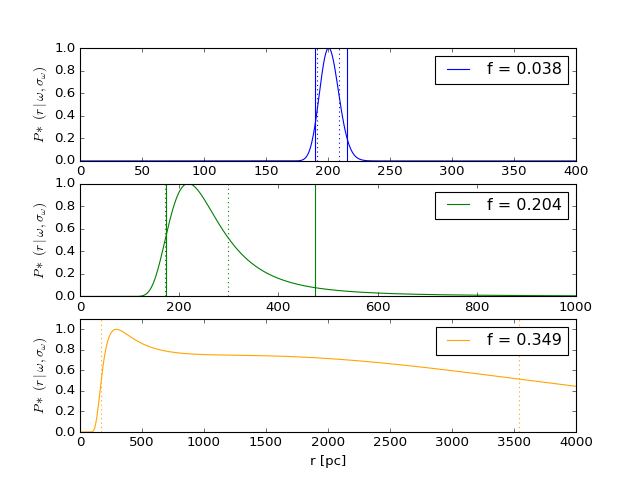

In [73]:
omega,sigma = k['parallax'].values/1000,k['parallax_error'].values/1000
index1=100
index2=95
index3=107

%matplotlib notebook
plt.subplot(311)
r = np.linspace(1,400,1e3-1)
post1 = (r**2*np.exp(-r/L)/sigma[index1])*np.exp((-1/(2*(sigma[index1])**2))*(omega[index1]-(1/r))**2)
plt.plot(r,post1/np.max(post1),label='f = {0}'.format(np.round(f[index1],decimals=3)))
plt.axvline(x=k['dist_95ci_lo'].values[index1])
plt.axvline(x=k['dist_95ci_hi'].values[index1])
plt.axvline(x=k['fwhm_lo'].values[index1],ls=':')
plt.axvline(x=k['fwhm_hi'].values[index1],ls=':')
plt.legend()
plt.ylabel('$P*\;(r \mid \omega , \sigma_{\omega})$')

plt.subplot(312)
r = np.linspace(1,1000,1e3-1)
post2 = (r**2*np.exp(-r/L)/(sigma[index2]))*np.exp((-1/(2*(sigma[index2])**2))*(omega[index2]-(1/r))**2)
plt.plot(r,post2/np.max(post2),label='f = {0}'.format(np.round(f[index2],decimals=3)),color='green')
plt.axvline(x=k['dist_95ci_lo'].values[index2],color='green')
plt.axvline(x=k['dist_95ci_hi'].values[index2],color='green')
plt.axvline(x=k['fwhm_lo'].values[index2],ls=':',color='green')
plt.axvline(x=k['fwhm_hi'].values[index2],ls=':',color='green')
plt.legend()
plt.ylabel('$P*\;(r \mid \omega , \sigma_{\omega})$')

plt.subplot(313)
r = np.linspace(1,4000,1e3-1)
post3 = (r**2*np.exp(-r/L)/(sigma[index3]))*np.exp((-1/(2*(sigma[index3])**2))*(omega[index3]-(1/r))**2)
plt.plot(r,post3/np.max(post3),label='f = {0}'.format(np.round(f[index3],decimals=3)),color='orange')
#plt.axvline(x=k['dist_95ci_lo'].values[index3],color='orange')
#plt.axvline(x=k['dist_95ci_hi'].values[index3],color='orange')
plt.axvline(x=k['fwhm_lo'].values[index3],ls=':',color='orange')
plt.axvline(x=k['fwhm_hi'].values[index3],ls=':',color='orange')
plt.ylim(0,1.1)
plt.legend()
plt.ylabel('$P*\;(r \mid \omega , \sigma_{\omega})$')
plt.xlabel('r [pc]')
plt.show()


As you may have noticed in the cell above, the proposal width had to be adjusted depending on values of f in order to get a decent acceptance rate.  In the plot above, the solid line makes the MCMC 95% CI, and the dotted line marks the FWHM.  For the low value of f, the FWHM looks great, and the MCMC did a decent job (but not awesome) of finding the 95% CI.  The uncertainty would be well estimated by the FWHM/2.355.  In the middle case, the FWHM looks pretty good, so does the MCMC.  In the lower case, the MCMC wandered off and was not well behaved at all.  And the FWHM is huge, and not a good parameter for estimating the error or the shape of the distribution at all.  

All of this shows how difficult it is to make any sort of reliable estimate of the distance with poor parallax solutions.

#### Another example:
Particularly, look at this example from another dataset, where I took the 1M sources with the largest parallax values

<IPython.core.display.Javascript object>


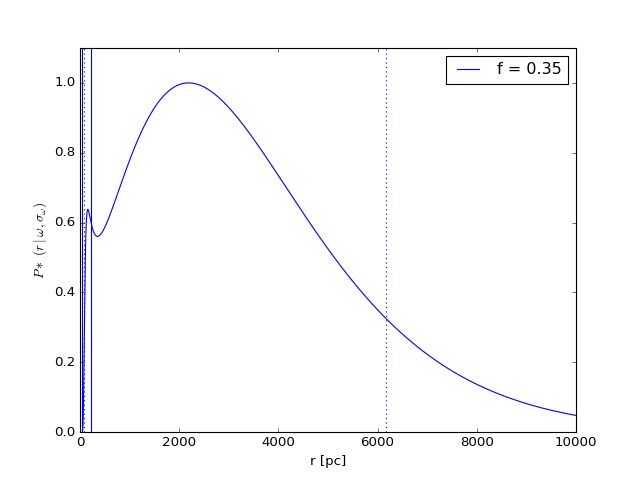

In [80]:
L=1350
r = np.linspace(50,10000,1e3-1)

post = (r**2*np.exp(-r/L)/3.334/1000)*\
    np.exp((-1/(2*(3.334/1000)**2))*(9.6453/1000-(1/r))**2)

%matplotlib notebook
plt.plot(r,post/np.max(post),label='f = {0}'.format(0.35))
plt.axvline(x=32.80)
plt.axvline(x=229.1707)
plt.axvline(x=89.259,ls=':')
plt.axvline(x=6177.39,ls=':')

plt.ylim(0,1.1)
plt.legend()
plt.ylabel('$P*\;(r \mid \omega , \sigma_{\omega})$')
plt.xlabel('r [pc]')
plt.show()

The FWHM compared to MCMC derived 95% CI looked fishy to me, so I dug in deeper.<br>

The dotted line is the FWHM hi/lo, and the solid is MCMC 95% CI hi/lo.  There are two maxima in this posterior, one ~2000 pc and one ~150 pc.  The MCMC stayed within the local maxima nicely, while the FWHM encompasses the entire posterior.  I checked this against the methods of B-J15 (https://arxiv.org/pdf/1507.02105.pdf) from which this is derived.  He lays out the case that there is a possibility that the roots of the distance estimator polynomial might be three positive roots, correponding to two maxima and one minimum, which is the case here.  He gives an arguement for selecting the smallest root as the distance estimator in this case (pg 14 & 15), if the parallax is positive, which we have here.  He says:<br>

"I continue to use the mode at the lower value of r as the distance estimator, because we can think of this one as being dominated by the data: it continues to evolve smoothly from the data-dominated regime (small ftrue)... [when the second mode appears] [t]his corresponds to the “data-dominated” mode disappearing, leaving only the other,“prior-dominated”, mode for all larger values of ftrue... Whenever we have two modes, it is always the smaller one which is dictated by the data, so we can always make the correct choice of distance estimator."


So, yes.  This is correct according to his methodology and analysis.  The local maxmimum around 150 pc is the "data driven" max, and the second maximum is the prior-driven max.  

In [78]:
# The roots of the polynomial:
coeff = np.array([(1./L),(-2),((9.6453/1000)/((3.334/1000)**2)),\
                  -(1./((3.334/1000)**2))])
g = np.roots(coeff)
print g

[ 2190.54045435   351.90833403   157.55121162]


So what happened with FWHM?<br>
I couldn't find a discussion on FWHM in any Bailer-Jones paper.  But it was computed using his methodology found here (https://github.com/agabrown/astrometry-inference-tutorials/blob/master/single-source/tutorial/Rcode/distance_functions.R  Line 144) using root finding.  It appears that this method found the FWHM corresponding to the larger prior-driven root.  If I restrict the max distance to localize the root finding around the smaller local maximum, it doesn't even find that maxmimum.  This equation as written only seems to work for finding FWHM around the absolute maxmimum and not local maxima.<br>
So FWHM should just be disregarded for high f solutions.

B-J2015 discusses in depth how as the fractional error increases the resulting posterior more and more approaches the shape of the prior, and no longer reflects the data. In this example we see a case where the data is just barely edging out the prior in giving us a distance estimate, that is probably a pretty good distance estimate.  But a number without uncertainty is essentially meaningless, and estimating the uncertainty is exceedingly tricky with poor quality results.

# Conclusion
Fractional parallax error is vital to estimating distance if you're going to use a Bayesian approach (its life or death if you're simply inverting the parallax!).  If you want to estimate the distance for several single sources from Gaia parallax, I recommend:<br>
-Get sources with f<0.05.  f<0.025 is really much better.<br>
-Determine distance estimator and FWHM from the methods in this notebook.<br>
-Determine sigma as FWHM/2.355